### Environment Setup 

In [1]:

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format
import env

In [2]:
import wrangle

from wrangle import wrangle_video_games, split, seperate_y, scale_data, split_seperate_scale

### Data Wrangle

In [3]:
df = wrangle_video_games()

In [4]:
df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Simulation,Sports,Strategy,AO,E,E10+,K-A,M,RP,T
0,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,76.00,51.00,...,0,1,0,0,1,0,0,0,0,0
2,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.00,73.00,...,0,0,0,0,1,0,0,0,0,0
3,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.00,73.00,...,0,1,0,0,1,0,0,0,0,0
6,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.00,65.00,...,0,0,0,0,1,0,0,0,0,0
7,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.92,58.00,41.00,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df.shape

(7878, 48)

In [6]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_seperate_scale(df)

In [7]:
train.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Simulation,Sports,Strategy,AO,E,E10+,K-A,M,RP,T
8870,GC,2006,Action,0.12,0.03,0.00,0.00,0.15,50.00,31.00,...,0,0,0,0,0,0,0,0,0,1
3105,GBA,2003,Strategy,0.47,0.17,0.00,0.01,0.65,89.00,34.00,...,0,0,1,0,1,0,0,0,0,0
6484,X360,2012,Action,0.18,0.05,0.00,0.02,0.26,63.00,13.00,...,0,0,0,0,1,0,0,0,0,0
4368,PC,2014,Action,0.15,0.26,0.00,0.03,0.45,77.00,18.00,...,0,0,0,0,0,0,0,1,0,0
2664,PS2,2001,Platform,0.38,0.29,0.00,0.10,0.77,84.00,33.00,...,0,0,0,0,0,0,0,0,0,1


In [8]:
train.shape

(4411, 48)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4411 entries, 8870 to 1416
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         4411 non-null   object 
 1   Year_of_Release  4411 non-null   int64  
 2   Genre            4411 non-null   object 
 3   NA_Sales         4411 non-null   float64
 4   EU_Sales         4411 non-null   float64
 5   JP_Sales         4411 non-null   float64
 6   Other_Sales      4411 non-null   float64
 7   Global_Sales     4411 non-null   float64
 8   Critic_Score     4411 non-null   float64
 9   Critic_Count     4411 non-null   float64
 10  User_Score       4411 non-null   float64
 11  Rating           4411 non-null   object 
 12  3DS              4411 non-null   uint8  
 13  DC               4411 non-null   uint8  
 14  DS               4411 non-null   uint8  
 15  GBA              4411 non-null   uint8  
 16  GC               4411 non-null   uint8  
 17  PC         

In [10]:
train.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,3DS,...,Simulation,Sports,Strategy,AO,E,E10+,K-A,M,RP,T
count,"4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00",...,"4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00","4,411.00"
mean,"2,007.17",0.36,0.21,0.06,0.07,0.70,68.98,26.61,7.18,0.02,...,0.04,0.15,0.03,0.00,0.34,0.14,0.00,0.19,0.00,0.33
std,4.20,1.01,0.70,0.29,0.22,2.01,13.90,19.22,1.34,0.14,...,0.20,0.36,0.18,0.00,0.48,0.35,0.02,0.39,0.00,0.47
min,"1,985.00",0.00,0.00,0.00,0.00,0.01,13.00,3.00,0.50,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,004.00",0.05,0.01,0.00,0.01,0.10,60.00,12.00,6.70,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,007.00",0.13,0.05,0.00,0.02,0.24,71.00,22.00,7.30,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"2,010.00",0.34,0.18,0.01,0.06,0.64,79.00,37.00,8.10,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
max,"2,016.00",41.36,28.96,5.33,8.45,82.53,97.00,113.00,9.50,1.00,...,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00


# Exploration

In [11]:
import explore

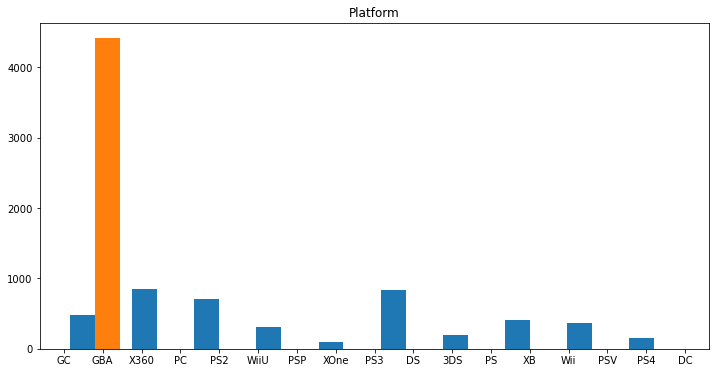

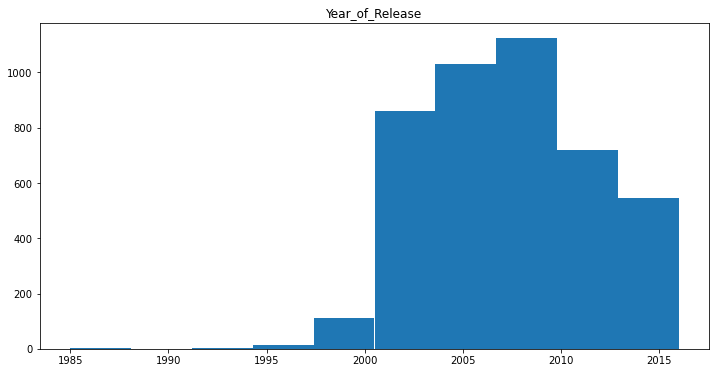

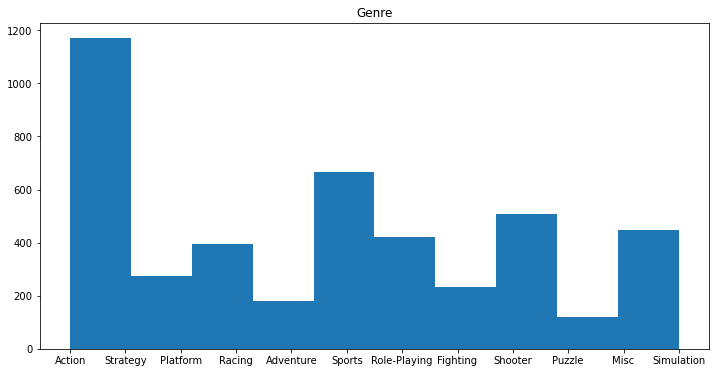

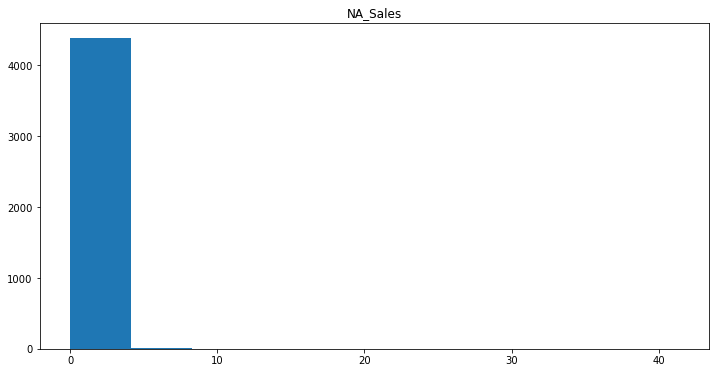

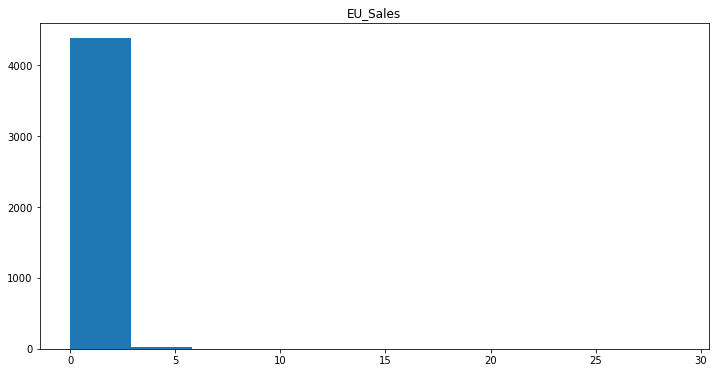

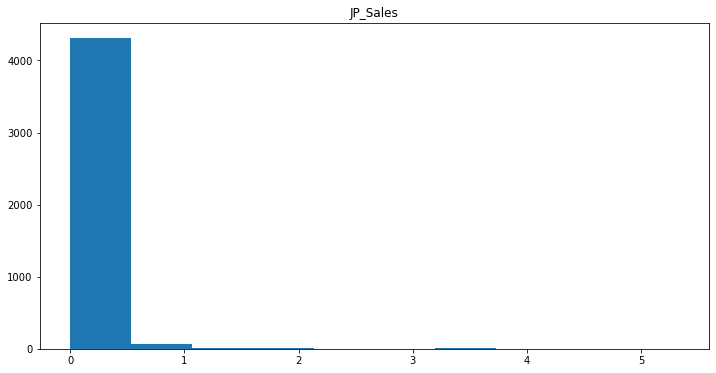

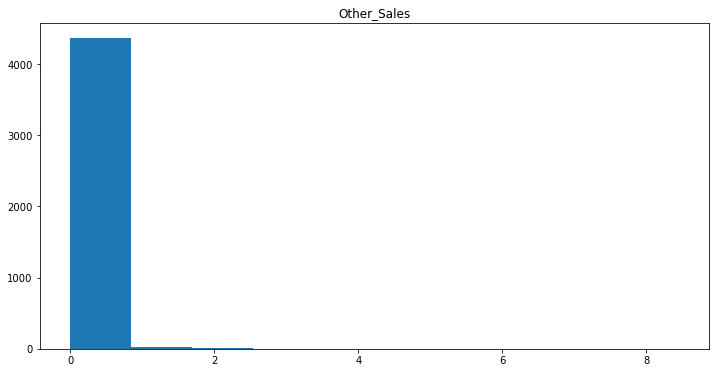

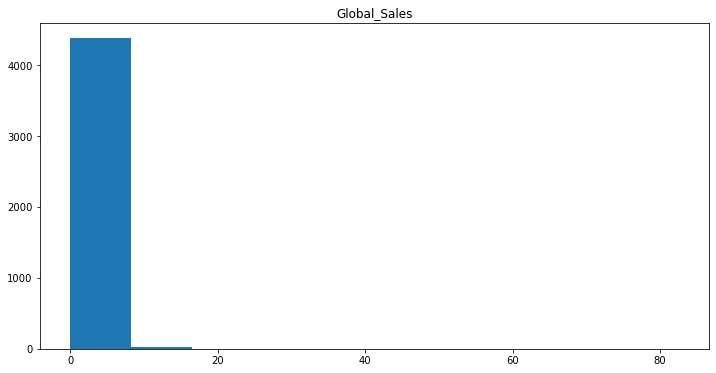

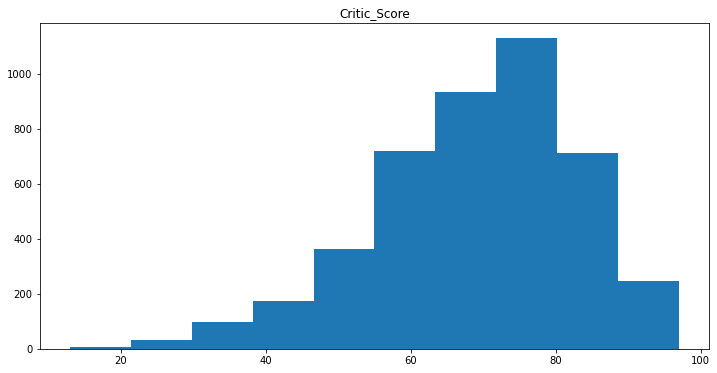

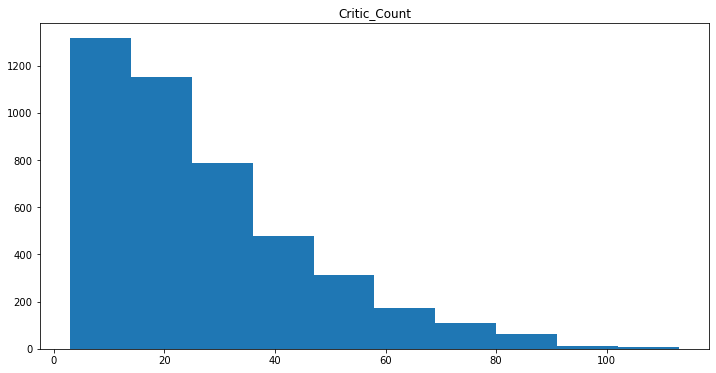

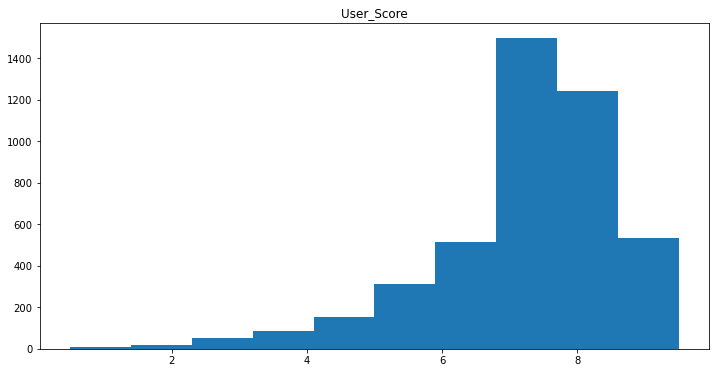

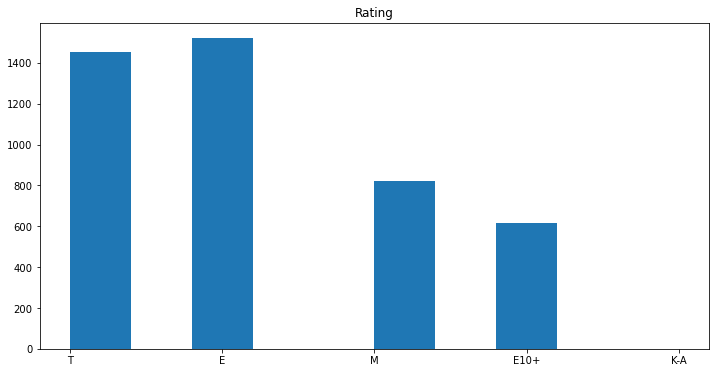

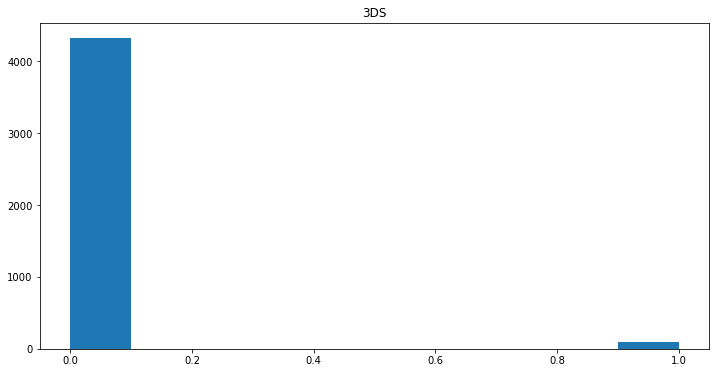

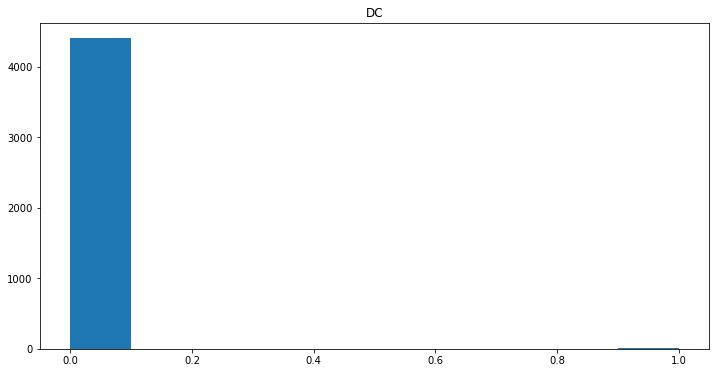

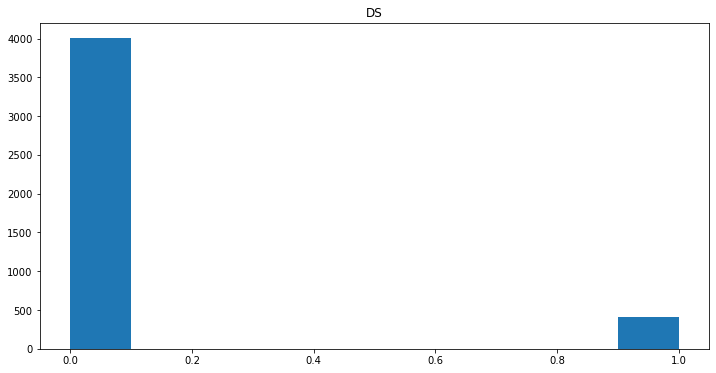

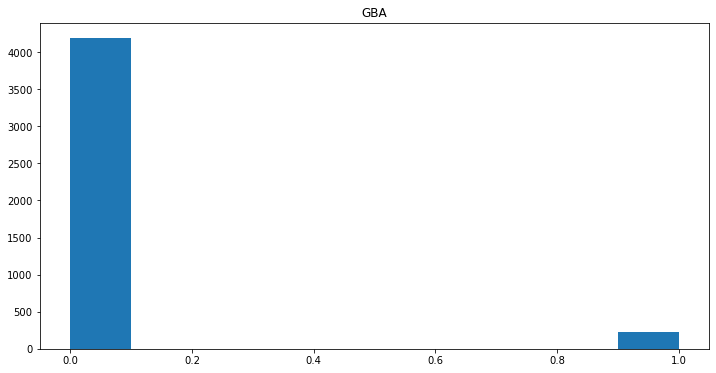

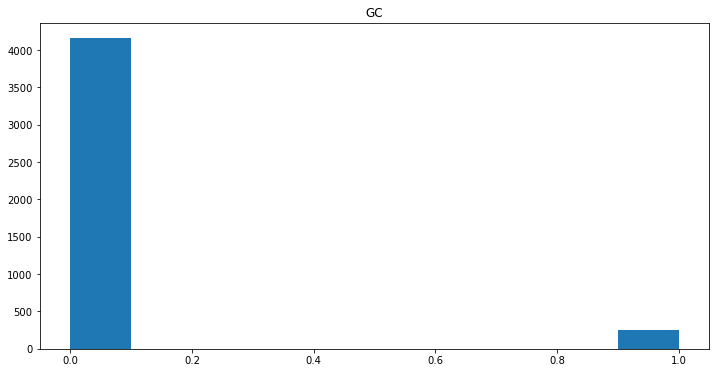

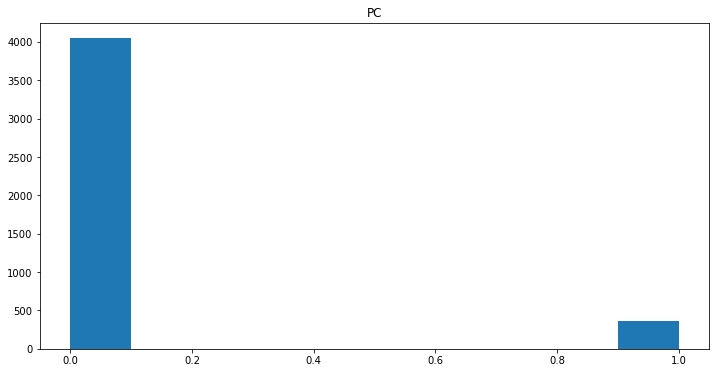

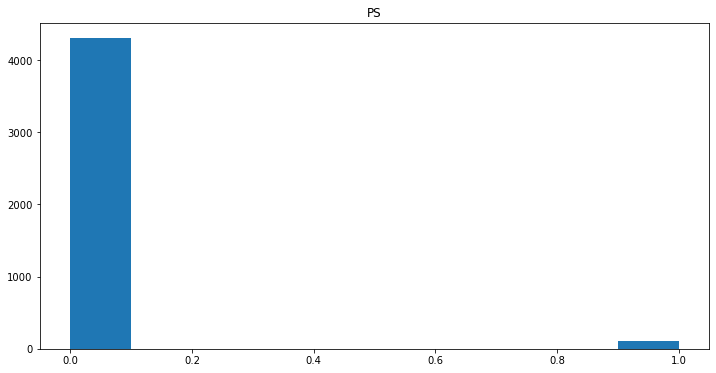

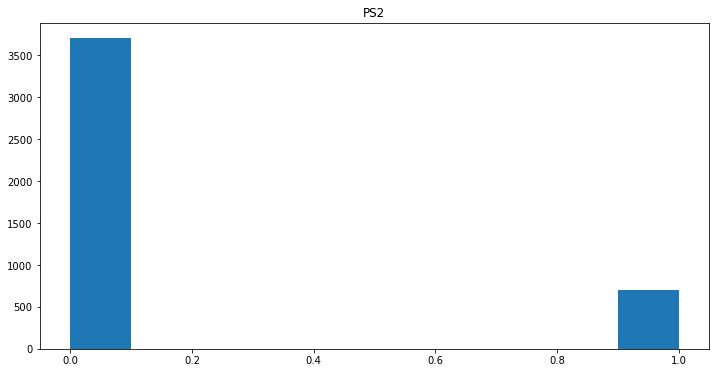

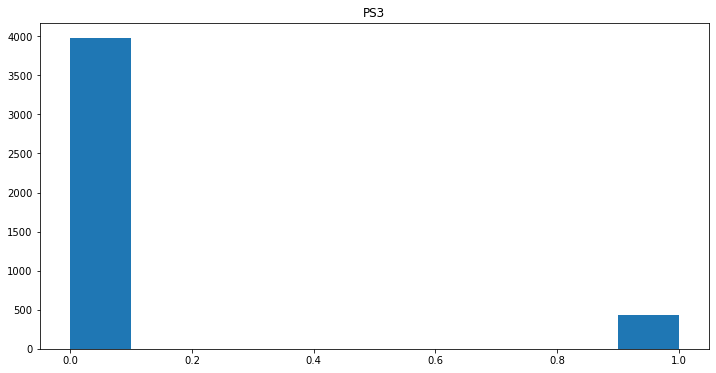

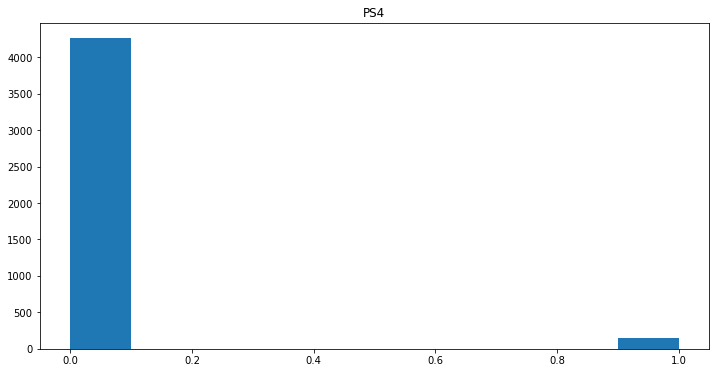

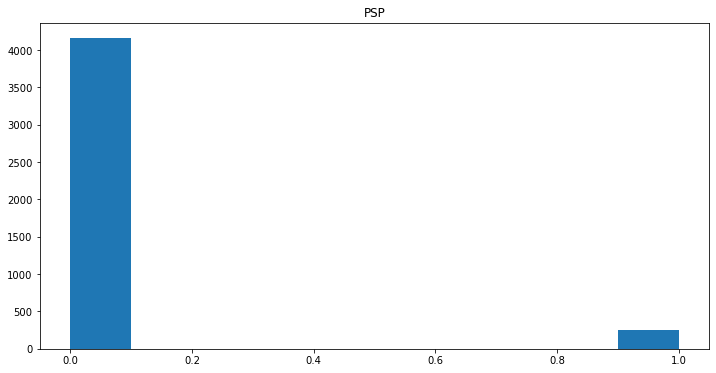

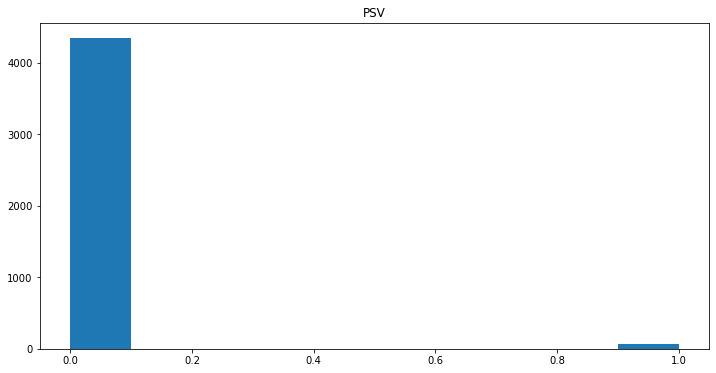

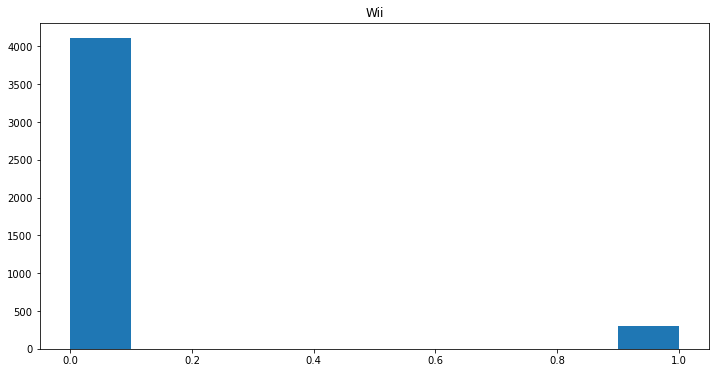

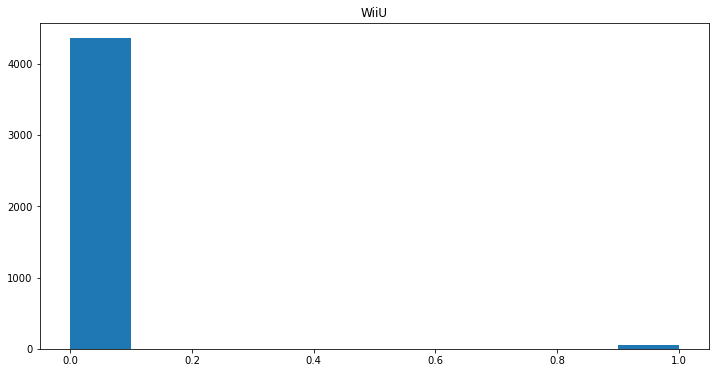

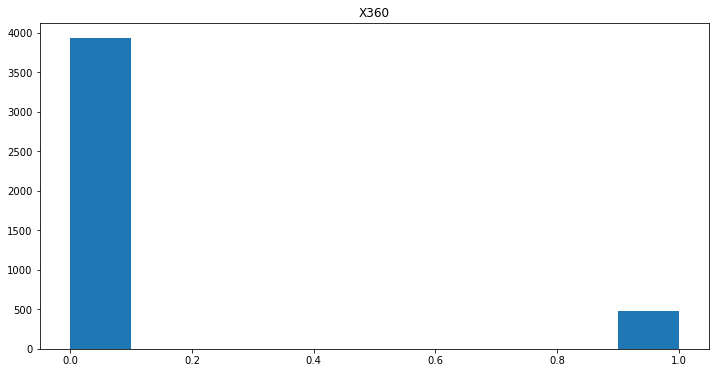

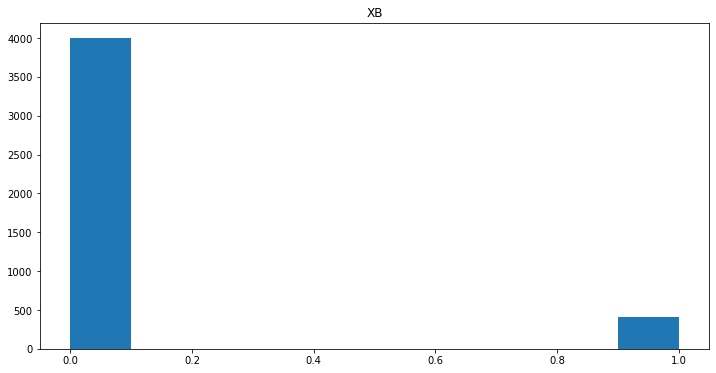

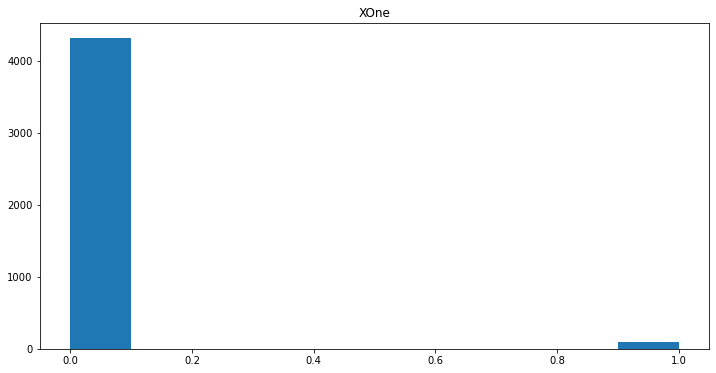

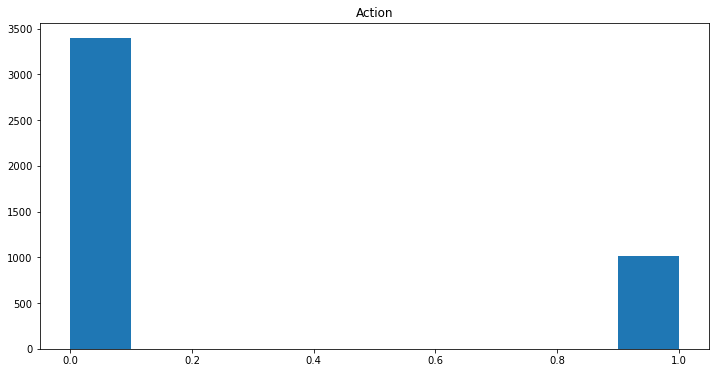

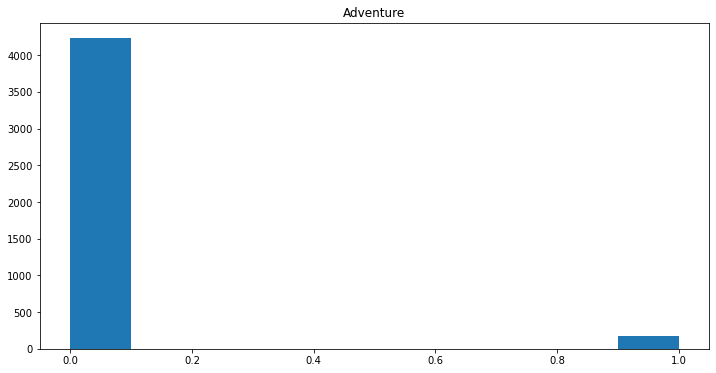

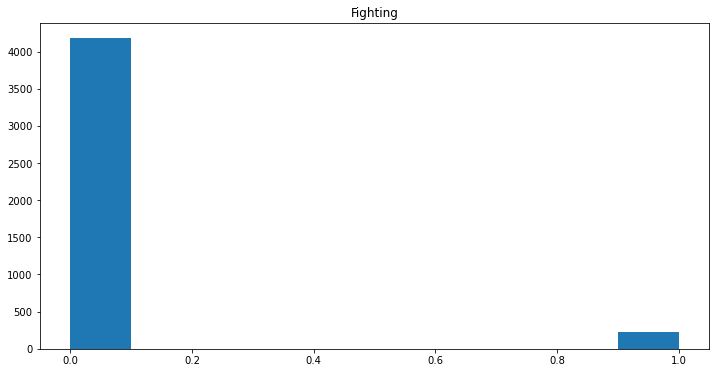

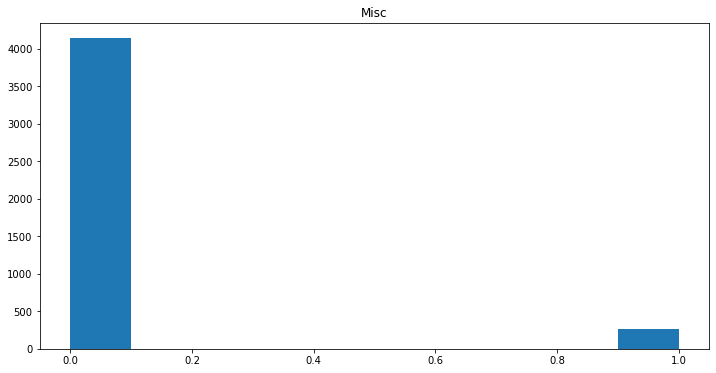

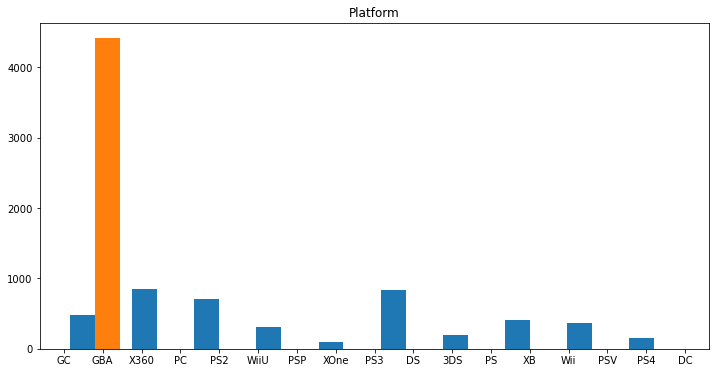

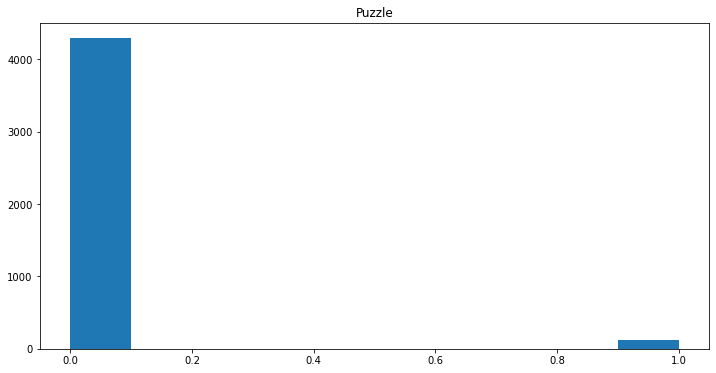

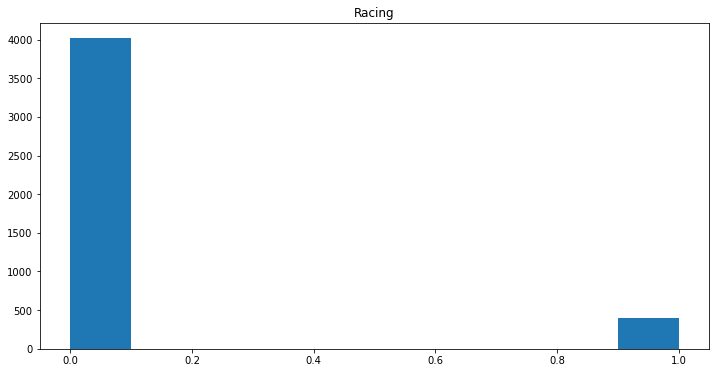

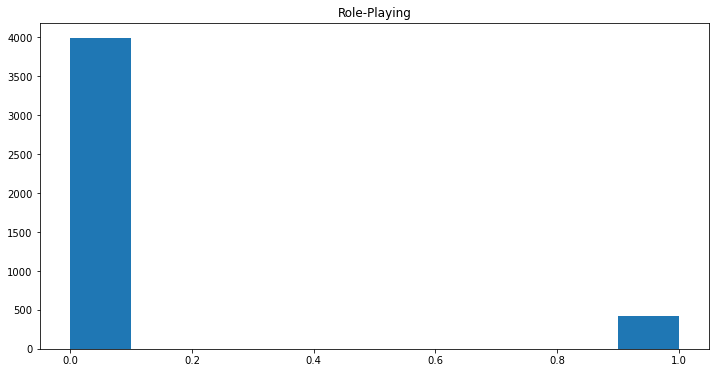

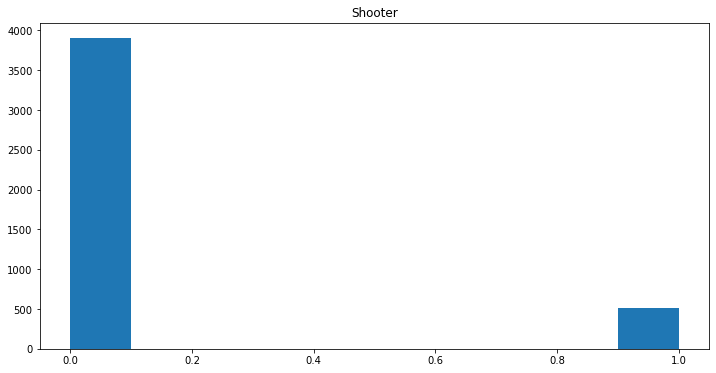

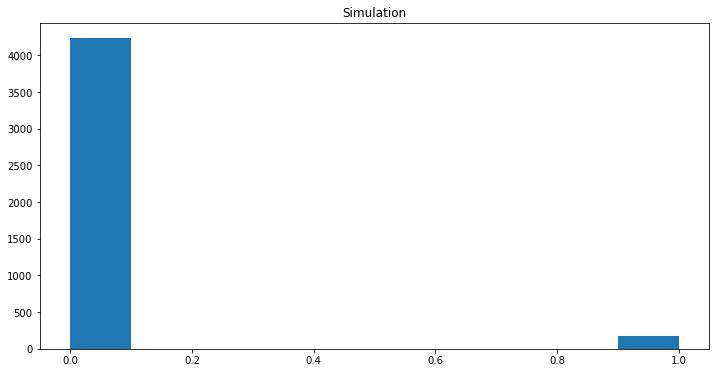

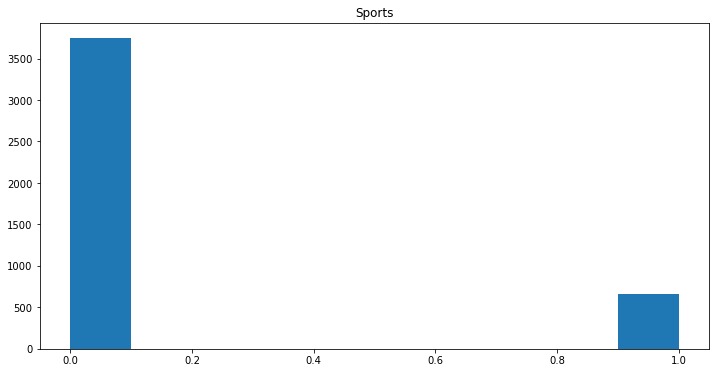

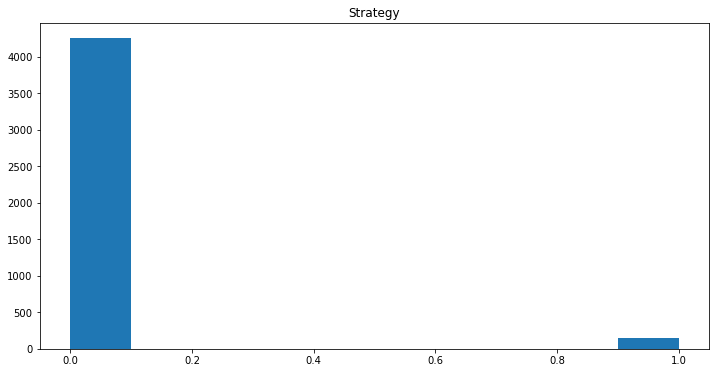

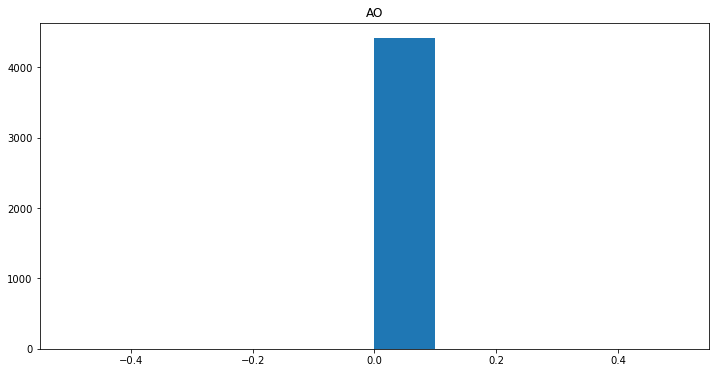

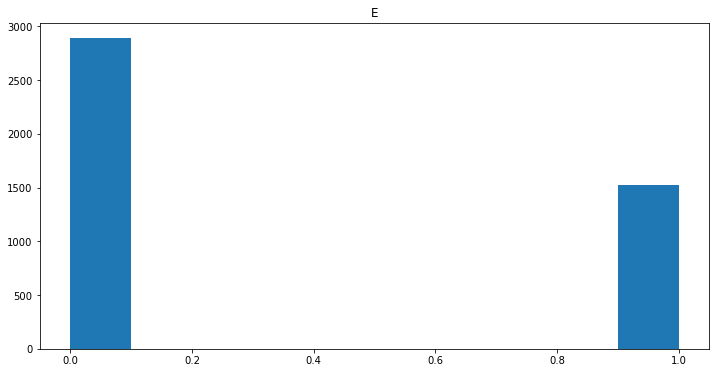

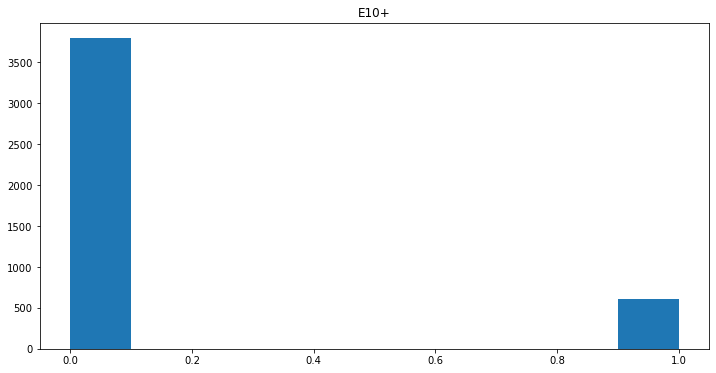

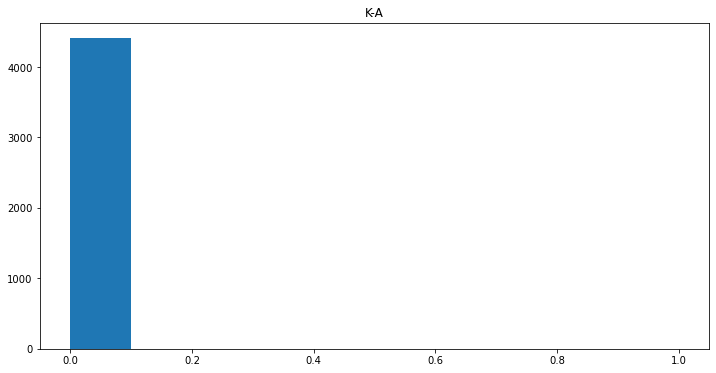

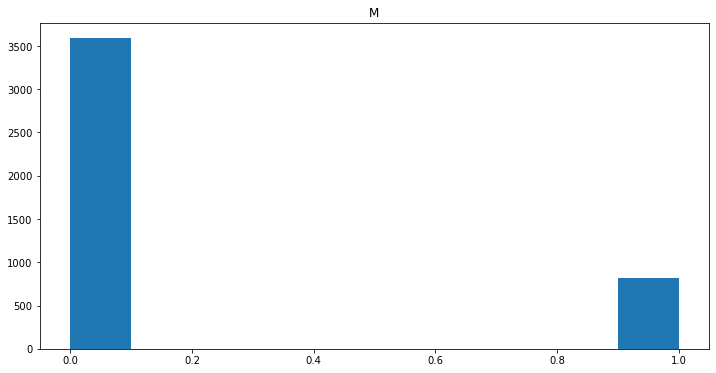

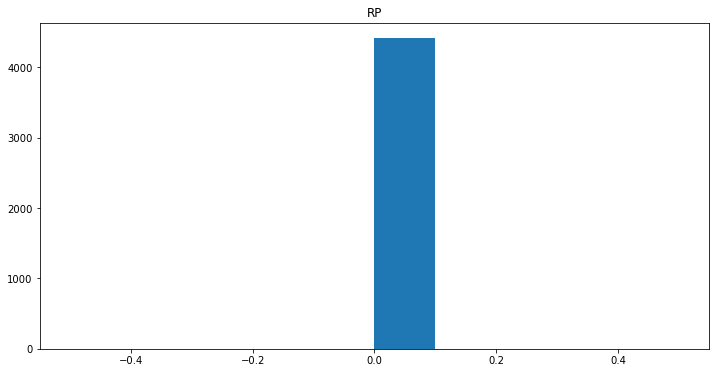

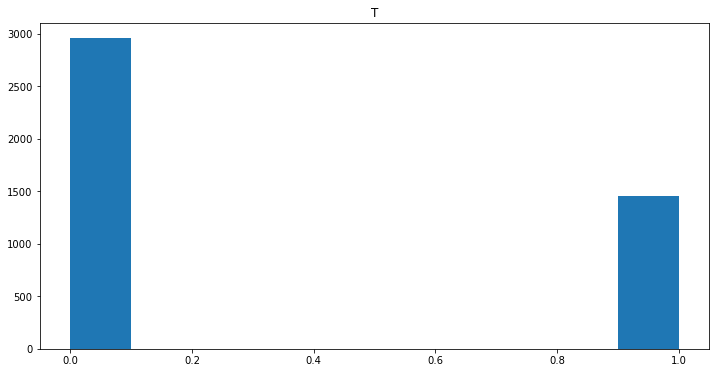

In [18]:
for col in train.columns:
    plt.figure(figsize=(12,6))
    plt.hist(train[col])
    plt.title(col)
    plt.show()